### **COMPUTER VISION - ASSIGNMENT 1**
SADWI KANDULA





### **Problem 1 - Filtering**

In [22]:
# importing required libraries such as OpenCV, Numpy, Tensorflow and Matplotlib
import cv2
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Loading the CIFAR-10 dataset using keras library
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Creating an empty list to store the selected images from CIFAR-10 dataset
selected_images = []

# Iterating over the classes
for i in range(10):
    # Find the first image of the current class in the training set in the CIFAR-10 dataset
    image_index = next((index for index, label in enumerate(y_train) if label[0] == i), None)
    # Append the image to the list of selected images
    selected_images.append(x_train[image_index])

# Gaussian filter function
def gaussian_filter(img, sigma=1):
    return cv2.GaussianBlur(img, (3,3), sigma)

# Moving average filter function
def average_filter(img):
    return cv2.blur(img, (3,3))

# Median filter function
def median_filter(img):
    return cv2.medianBlur(img, 3)

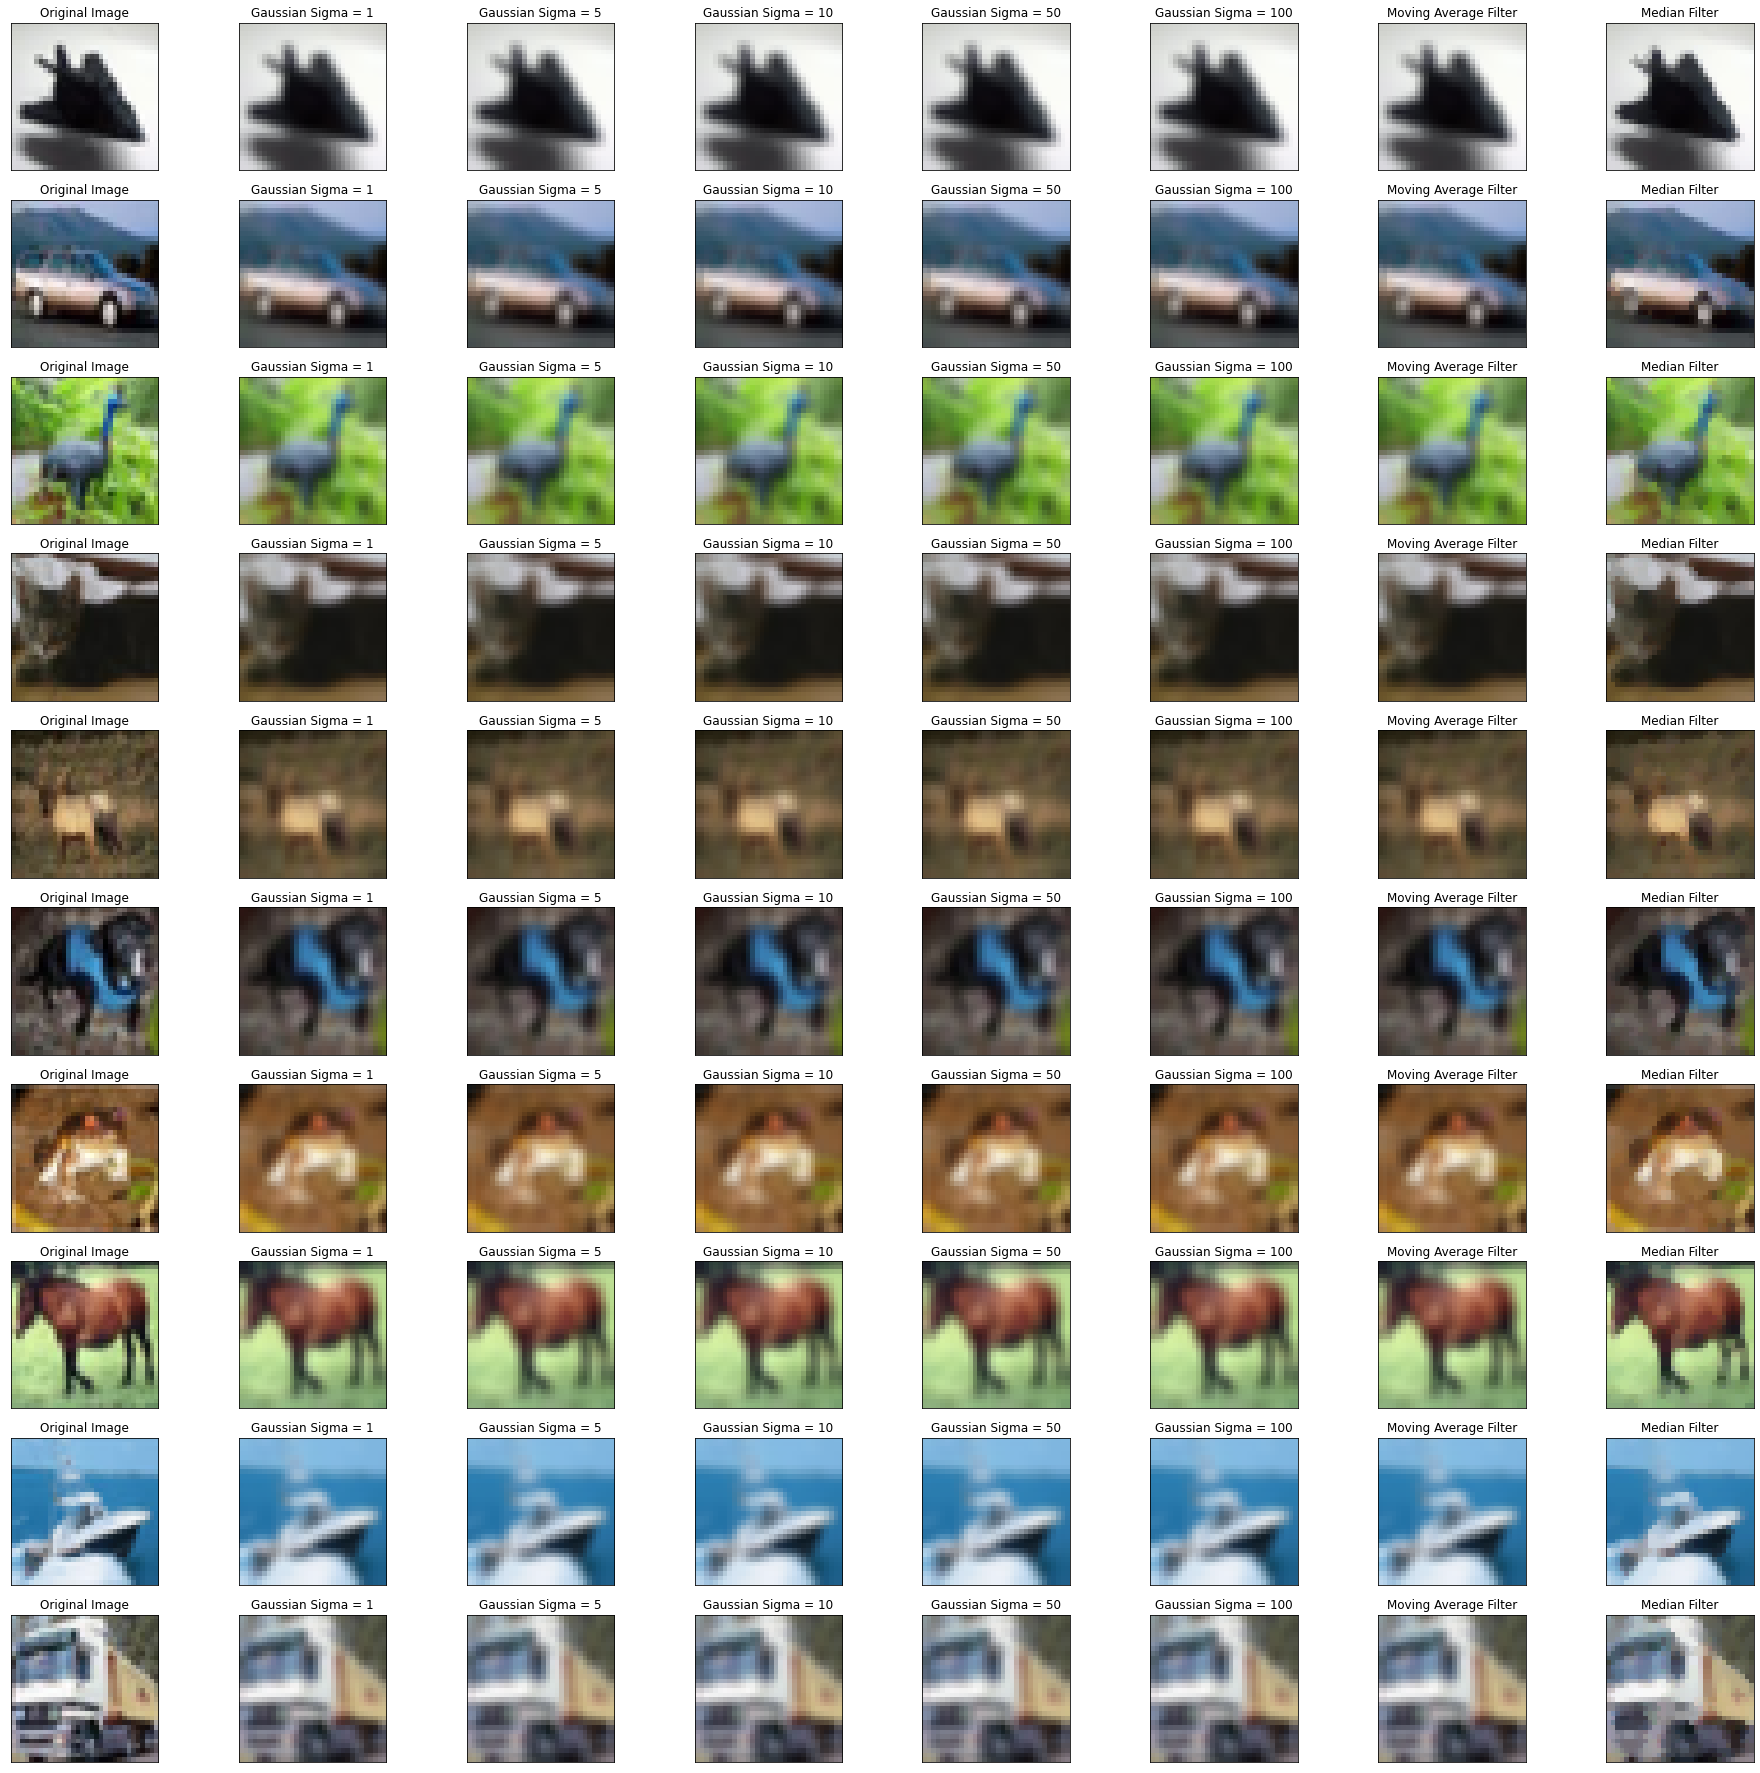

In [23]:
# Displaying the original image
fig = plt.figure(figsize=(32, 32))
for i in range(10):
    plt.subplot(10, 8, i*8 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(selected_images[i])
    plt.title("Original Image")

    # Applying Gaussian filter on the images using different values of sigma
    for j, sigma in enumerate([1,5,10,50,100]):
        plt.subplot(10, 8, i*8 + j+2)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        filtered_image = gaussian_filter(selected_images[i], sigma)
        plt.imshow(filtered_image)
        plt.title("Gaussian Sigma = {}".format(sigma))

    # Applying Moving Average filter on the images 
    plt.subplot(10, 8, i*8 + 7)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    filtered_image = average_filter(selected_images[i])
    plt.imshow(filtered_image)
    plt.title("Moving Average Filter")


    # Applying Median filter on the images
    plt.subplot(10, 8, i*8 + 8)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    filtered_image = median_filter(selected_images[i])
    plt.imshow(filtered_image)
    plt.title("Median Filter")

plt.show()

### **Problem 2 - Edge Detection**

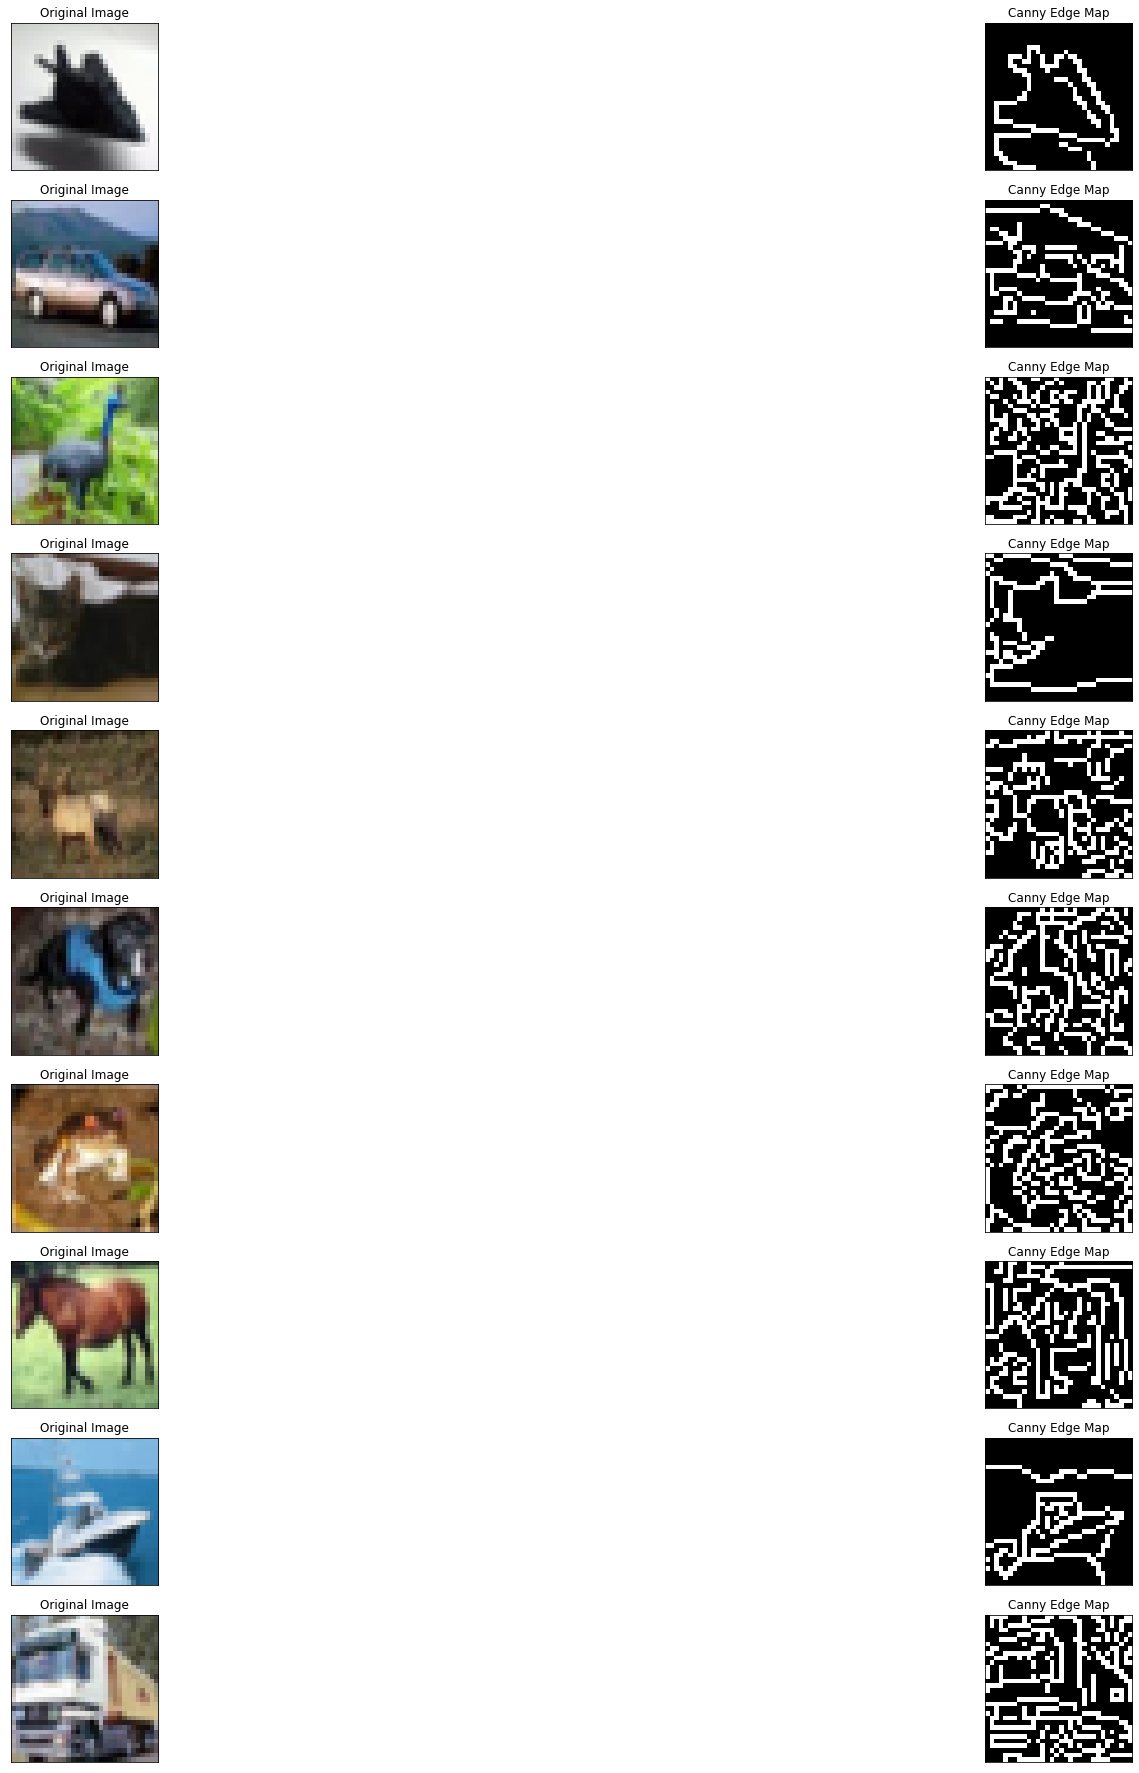

In [24]:

# Canny edge detector function
def canny_edge_detector(img, low_threshold=50, high_threshold=150):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, low_threshold, high_threshold)
    return edges

# Comparing and plotting the Original Image and Canny edge maps
fig = plt.figure(figsize=(32, 32))
for i in range(10):
    plt.subplot(10, 2, i*2 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(selected_images[i])
    plt.title("Original Image")

    plt.subplot(10, 2, i*2 + 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    edge_map = canny_edge_detector(selected_images[i])
    plt.imshow(edge_map, cmap='gray')
    plt.title("Canny Edge Map")

plt.show()

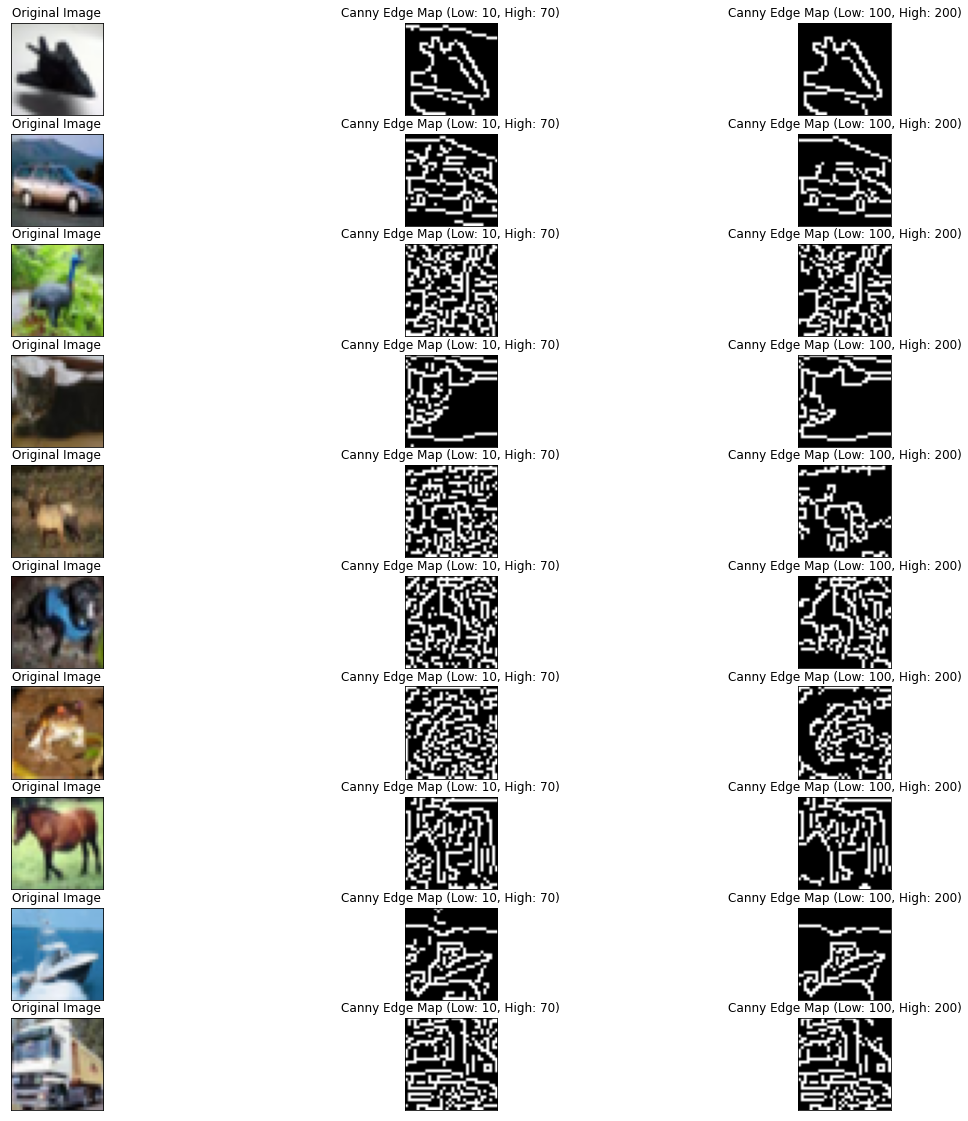

In [25]:

#Comparing Canny Edge Maps of the images using different threshold values
fig = plt.figure(figsize=(20, 20))

for i in range(10):
    plt.subplot(10, 3, i*3 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(selected_images[i])
    plt.title("Original Image")

    plt.subplot(10, 3, i*3 + 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    edge_map = canny_edge_detector(selected_images[i], low_threshold=10, high_threshold=70)
    plt.imshow(edge_map, cmap='gray')
    plt.title("Canny Edge Map (Low: 10, High: 70)")



    plt.subplot(10, 3, i*3 + 3)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    edge_map = canny_edge_detector(selected_images[i], low_threshold=100, high_threshold=200)
    plt.imshow(edge_map, cmap='gray')
    plt.title("Canny Edge Map (Low: 100, High: 200)")

plt.show()

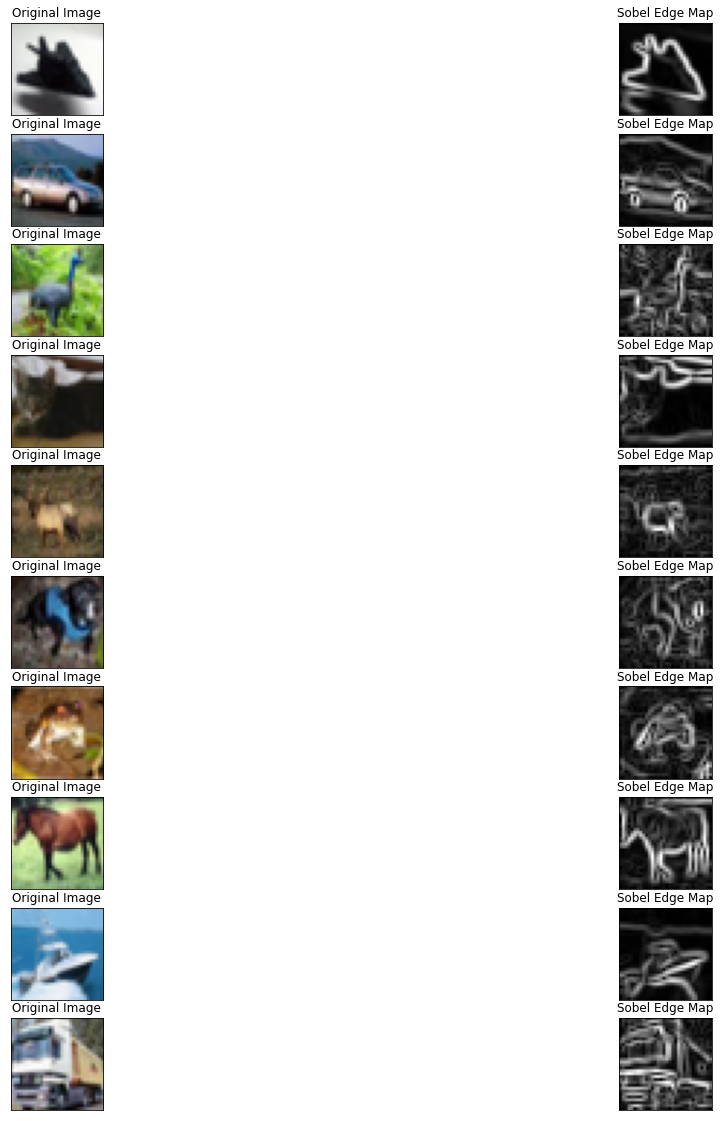

In [26]:
# Sobel edge detector function
def sobel_edge_detector(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    edge_map = np.sqrt(np.power(sobelx, 2) + np.power(sobely, 2))
    return edge_map

fig = plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(10, 2, i*2 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(selected_images[i])
    plt.title("Original Image")

    plt.subplot(10, 2, i*2 + 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    edge_map = sobel_edge_detector(selected_images[i])
    plt.imshow(edge_map, cmap='gray')
    plt.title("Sobel Edge Map")
plt.show()

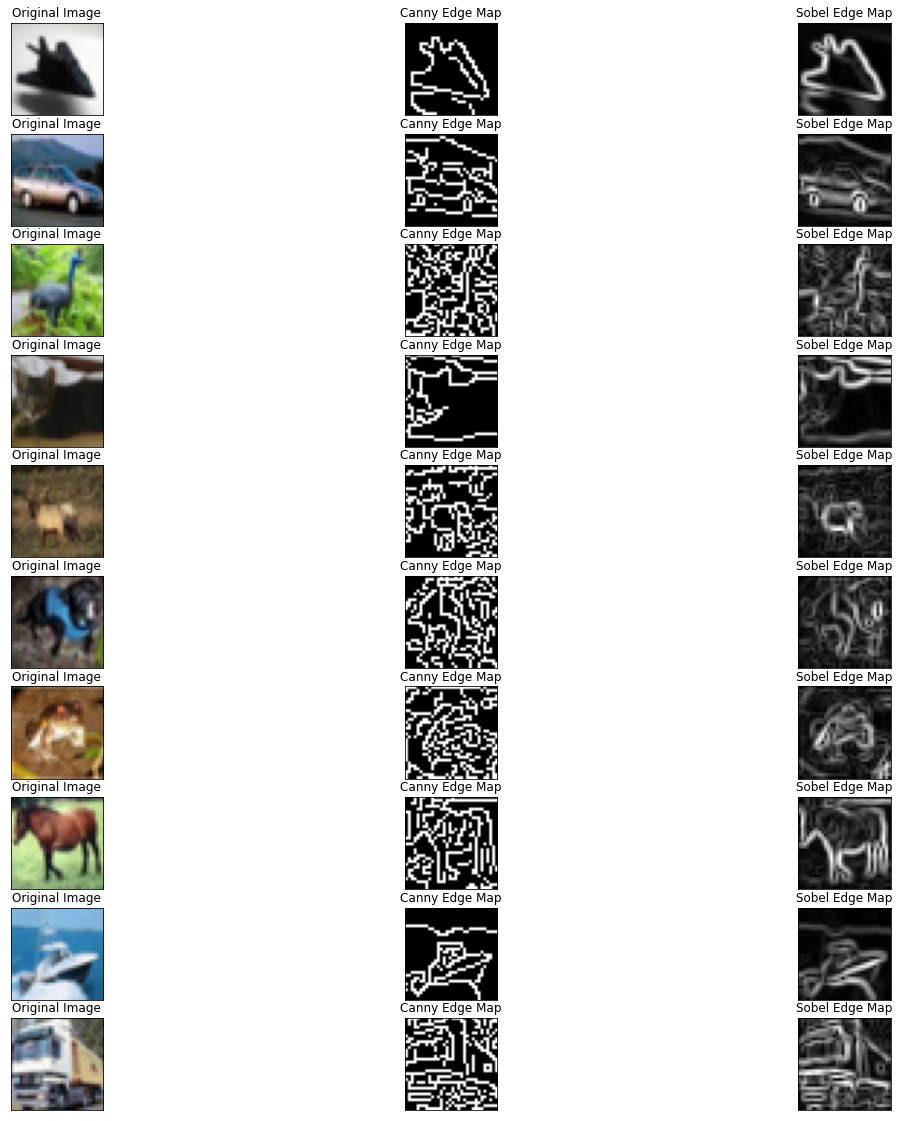

In [27]:
#Comparing Canny Edge Maps and Sobel edge Maps of the images

fig = plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(10, 3, i*3 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(selected_images[i])
    plt.title("Original Image")

    plt.subplot(10, 3, i*3 + 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    edge_map = canny_edge_detector(selected_images[i])
    plt.imshow(edge_map, cmap='gray')
    plt.title("Canny Edge Map")

    plt.subplot(10, 3, i*3 + 3)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    edge_map = sobel_edge_detector(selected_images[i])
    plt.imshow(edge_map, cmap='gray')
    plt.title("Sobel Edge Map")

plt.show()




### **Problem 3 - Corner Detection**

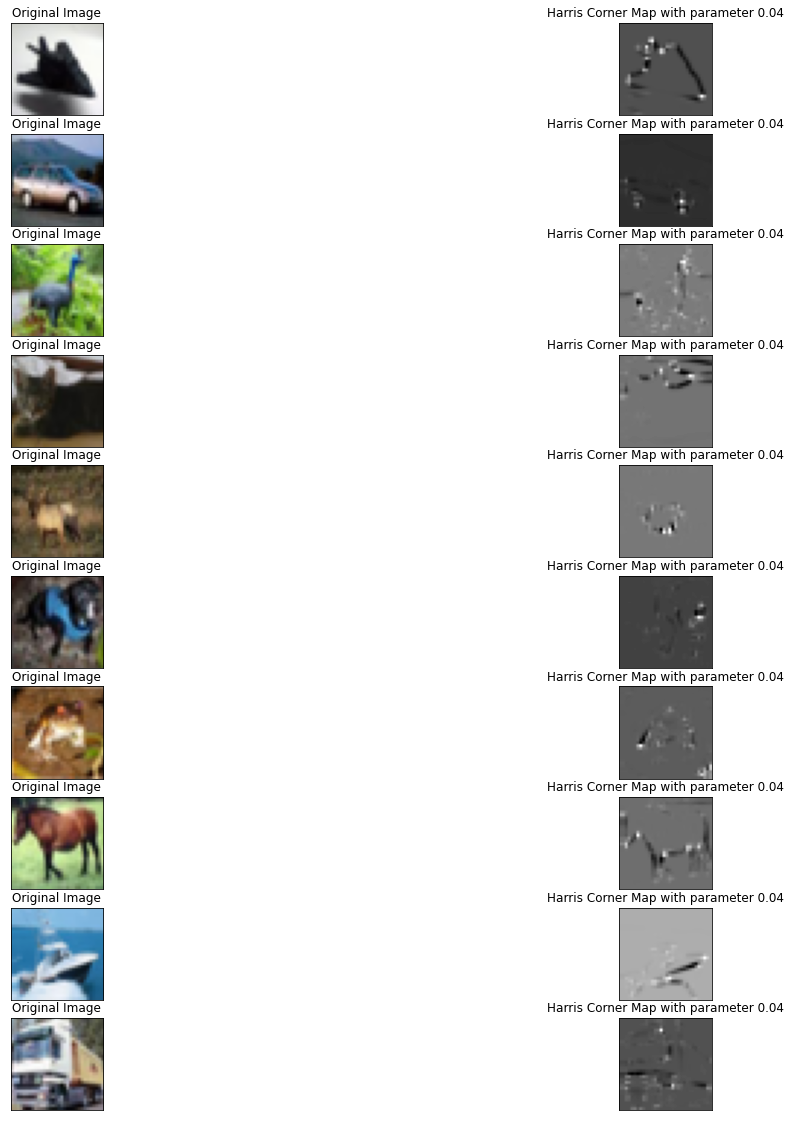

In [28]:
# harris corner detector function with value 0.04
def harris_corner_detector(img, harris_parameter=0.04):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, harris_parameter)
    return dst

fig = plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(10, 2, i*2 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(selected_images[i])
    plt.title("Original Image")

    plt.subplot(10, 2, i*2 + 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    corner_map = harris_corner_detector(selected_images[i], harris_parameter=0.04)
    plt.imshow(corner_map, cmap='gray')
    plt.title("Harris Corner Map with parameter 0.04")

 

   
plt.show()


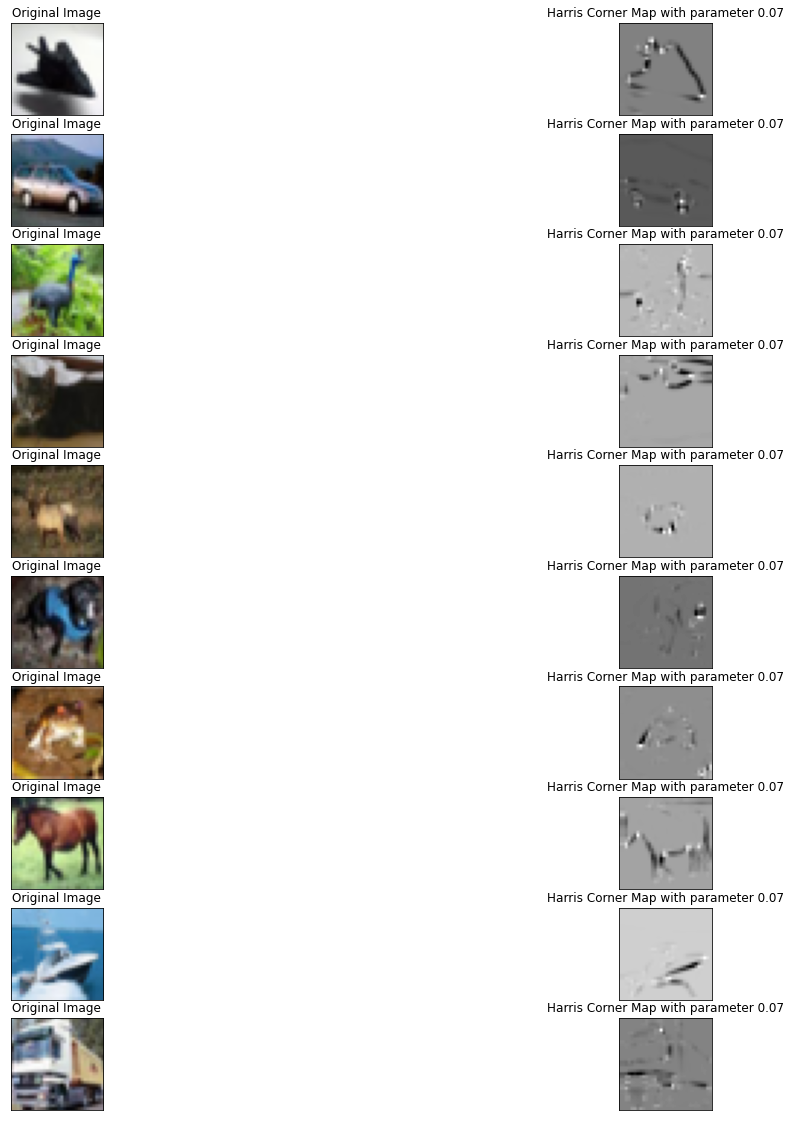

In [29]:
# harris corner detector function with value 0.07

fig = plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(10, 2, i*2 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(selected_images[i])
    plt.title("Original Image")

   

    plt.subplot(10, 2, i*2 + 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    corner_map = harris_corner_detector(selected_images[i], harris_parameter=0.07)
    plt.imshow(corner_map, cmap='gray')
    plt.title("Harris Corner Map with parameter 0.07")

plt.show()


### **Problem 4 - Convolution and Correlation**

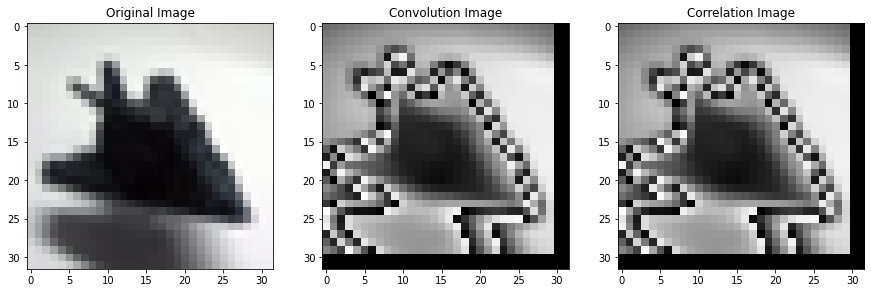

In [30]:
import numpy as np

# Selecting an image
img = selected_images[0]
#img = cv2.cvtColor(gray_image, cv2.COLOR_RGB2GRAY)

# Creating a box filter kernel of dimension 3x3
kernel = np.ones((3,3))/9

# 2D convolution
convolution_output = np.zeros_like(img)
for i in range(img.shape[0]-2):
    for j in range(img.shape[1]-2):
        convolution_output[i][j] = np.sum(img[i:i+3,j:j+3]*kernel)

# 2D correlation
correlation_output = np.zeros_like(img)
for i in range(img.shape[0]-2):
    for j in range(img.shape[1]-2):
        correlation_output[i][j] = np.sum(img[i:i+3,j:j+3]*np.flip(np.flip(kernel,0),1))
        #correlation_output[i][j] = np.sum(img[i:i+3,j:j+3]*np.flip(kernel,0),1)

# Plot the original image and the output images
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(convolution_output)
axs[1].set_title("Convolution Image")
axs[2].imshow(correlation_output)
axs[2].set_title("Correlation Image")
plt.show()

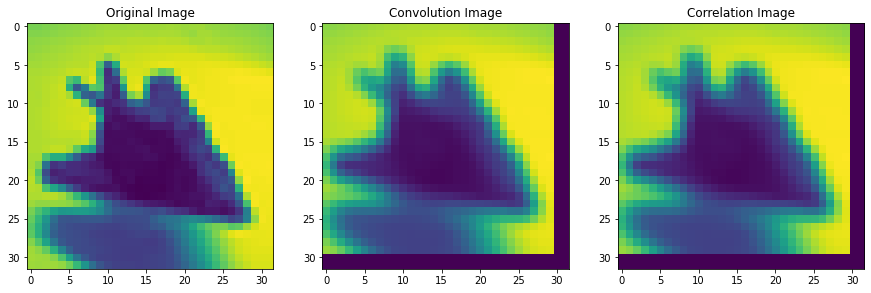

In [31]:
import cv2
import numpy as np

# Selecting and converting the RGB image to 2D image using OpenCV 
gray_image= selected_images[0]
img = cv2.cvtColor(gray_image, cv2.COLOR_RGB2GRAY)

# Creating a box filter kernel of dimension 3x3
kernel = np.ones((3,3))/9

# 2D convolution
convolution_output = np.zeros_like(img)
for i in range(img.shape[0]-2):
    for j in range(img.shape[1]-2):
        convolution_output[i][j] = np.sum(img[i:i+3,j:j+3]*kernel)

# 2D correlation
correlation_output = np.zeros_like(img)
for i in range(img.shape[0]-2):
    for j in range(img.shape[1]-2):
        correlation_output[i][j] = np.sum(img[i:i+3,j:j+3]*np.flip(np.flip(kernel,0),1))
        #correlation_output[i][j] = np.sum(img[i:i+3,j:j+3]*np.flip(kernel,0),1)

# Plot the original image and the output images
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(convolution_output)
axs[1].set_title("Convolution Image")
axs[2].imshow(correlation_output)
axs[2].set_title("Correlation Image")
plt.show()